# Projet numérique : choix du pas de temps

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Première approche : pas fixe

Nous cherchons à résoudre les équations différentielles du type :

$\dot{y} = f(t, y)$

Dans un premier temps, nous allons considérer le pas comme étant fixe. Il est difficle d'estimer à l'avance la valeur du pas, un pas trop grand provoquerait une trop grande erreur, un pas trop petit demanderait une puissance de calcul trop importante.

### Schéma d'ordre 1

On va utiliser le schéma d'Euler explicite :

Si la fonction x vérifie : $\dot{y} = f(t, y)$ et $y(t_0) = x_0$

Alors on peut évaluer la fonction point par point : $x_{n+1} = x_n + f(t_n, x_n)*dt$

In [73]:
def solve_euler_explicit(f, x0, dt, tf, t0 = 0):
    x = x0
    t = []
    k = t0
    while k < tf :  ## On segmente l'intervalle en division de longueur dt sauf pour la dernière
        t.append(k) ## dont la longueur est inférieure à dt et s'adapte pour que l'intervalle 
        k += dt     ## total soit bien [t0, tf]
    for n, i in enumerate(t[:-1]):
        prochain_point = x[-1] + f(i, x[-1])*(t[n+1] - t[n])
        x.append(prochain_point)
    return t, x

#### Illustration du schéma d'ordre 1

- On considère l'équation $\dot{y} = y$ vérifiée par la fonction $exp$, avec $y_0 = 1$

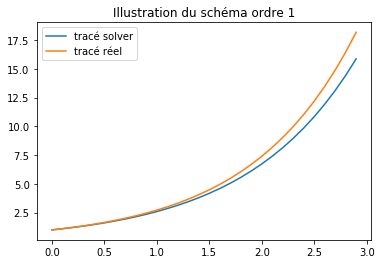

In [74]:
def f(t, x):
    return x

S = solve_euler_explicit(f, [1], 0.1, 3, 0)
x_axis = S[0]
y_solver = S[1]
y_reel = [np.exp(i) for i in x_axis]

plt.plot(x_axis, y_solver, label = "tracé solver")
plt.plot(x_axis, y_reel, label = "tracé réel")
plt.title('Illustration du schéma ordre 1')
plt.legend()
plt.show()

#### Mise en évidence de la convergence d'ordre 1

Nous cherchons $c_v$ tel que : 
$$ \max_{1 \leq j \leq J} |x^j - x(t_j)| \leq c_v * dt $$

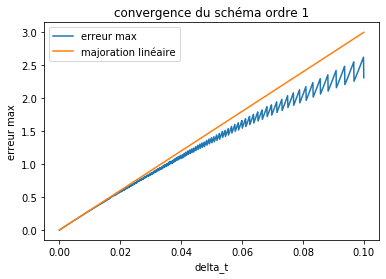

In [75]:
def max(f, g, x0, dt, tf, t0 = 0):
    S = solve_euler_explicit(f, x0, dt, tf, t0)
    m = 0
    for n, i in enumerate(S[0]):
        if abs(g(i) - S[1][n]) > m:
            m = abs(g(i) - S[1][n])
    return m

delta_t = np.linspace(10**-5, 0.1, 1000)
erreur_max = [max(f, np.exp, [1], i, 3, 0) for i in delta_t]
plt.plot(delta_t, erreur_max, label = 'erreur max')
plt.xlabel('delta_t')
plt.ylabel('erreur max')
plt.title('convergence du schéma ordre 1')
y = [30*i for i in delta_t]
plt.plot(delta_t, y, label = 'majoration linéaire')
plt.legend()
plt.show()

On observe bien une majoration linéaire en fonction de delta_t.

### Schéma d'ordre 2

On va utiliser la méthode de Heun :

$x_{j+1} = x_j + \frac{dt}{2} * (f(t_j, x_j) + f(t_{j+1}, x_j + dt*f(t_j, x_j)))$

In [76]:
def solver_heun(f, x0, dt, tf, t0 = 0):
    t = []
    k = t0
    while k < tf :
        t.append(k)
        k += dt
    t.append(tf)
    n = len(t)
    x = x0
    for i in range(n-1):
        h = t[i + 1] - t[i]
        p1 = f(t[i], x[i])
        p2 = f(t[i + 1], x[i] + (t[i+1] - t[i])*p1)
        x.append(x[i] + (t[i+1] - t[i])/2*(p1 + p2))
    return t, x

#### Illustration du schéma d'ordre 2 :

On reprend le même exemple de l'exponentielle

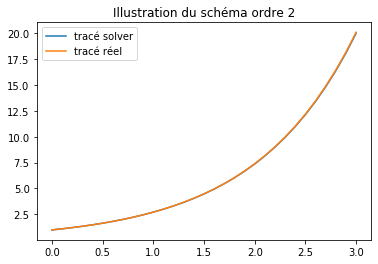

In [86]:
def f(t, x):
    return x

S = solver_heun(f, [1], 0.1, 3, 0)
x_axis = S[0]
y_solver = S[1]
y_reel = [np.exp(i) for i in x_axis]

plt.plot(x_axis, y_solver, label = "tracé solver")
plt.plot(x_axis, y_reel, label = "tracé réel")
plt.title('Illustration du schéma ordre 2')
plt.legend()
plt.show()

Pour un même pas (ici 0.1), on remarque que le schéma de Heun est bien plus précis que celui d'Euler explicite.

#### Mise en évidence de la convergence d'ordre 2

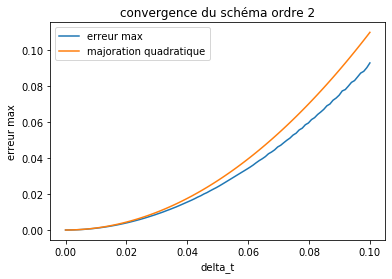

In [87]:
def max_heun(f, g, x0, dt, tf, t0 = 0):
    S = solver_heun(f, x0, dt, tf, t0)
    m = 0
    for n, i in enumerate(S[0]):
        if abs(g(i) - S[1][n]) > m:
            m = abs(g(i) - S[1][n])
    return m

delta_t = np.linspace(10**-5, 0.1, 100)
erreur_max = [max_heun(f, np.exp, [1], i, 3, 0) for i in delta_t]
plt.plot(delta_t, erreur_max, label = 'erreur max')
plt.xlabel('delta_t')
plt.ylabel('erreur max')
plt.title('convergence du schéma ordre 2')
y = [11*i**2 for i in delta_t]
plt.plot(delta_t, y, label = 'majoration quadratique')
plt.legend()
plt.show()

On observe bien une convergence d'ordre 2.

## Adaptation du pas de temps

$e^{j+1} = x^j + \int_{t_j}^{t_{j+1}}f(s, x(s))ds - x^{j+1}$

$e^{j+1} = x^j + x(t_{j+1}) - x(t_j) - x^{j+1}$

On prend $x^j = x(t_j)$ d'où :

$e^{j+1} = x(t_{j+1}) - x^{j+1}$

$e^{j+1} = x(t_j + \Delta t) - (x^j + \Delta tf(t_j, x^j))$ avec le schéma d'Euler explicite

$e^{j+1} = x^j + \Delta t\dot{x}^j + \frac{\Delta t^2}{2}\ddot{x}^j(t_j) - x^j - \Delta t\dot{x}^j$

$e^{j+1} = \frac{\Delta t^2}{2}\frac{\dot{x}(t_{j+1}) - \dot{x}(t_j)}{\Delta t}$

Or, $f(t_{j+1}, x^{j+1}) = f(t_{j+1}, x^j + \Delta t f(t_j, x^j) + O(\Delta t^2))$

$f(t_{j+1}, x^{j+1}) = f(t_{j+1}, x^{j+1} + O(\Delta t^2))$

$f(t_{j+1}, x^{j+1}) = f(t_{j+1}, x^{j+1}) + O(\Delta t^2) \partial _xf(t_{j+1}, x^{j+1})$

Or $f \in C^1$